In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/gdriveupmebot/archive.zip" -d "/tmp/data"

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
head_dir="/tmp/data"

In [3]:
print("Number of pictures")
for dir in os.listdir(head_dir):
  print(dir+": "+ str(len(os.listdir(head_dir+"/"+dir))))


Number of pictures
COVID: 1252
non-COVID: 1229


In [19]:
dir=[i for i in os.listdir("/tmp/data/COVID")]

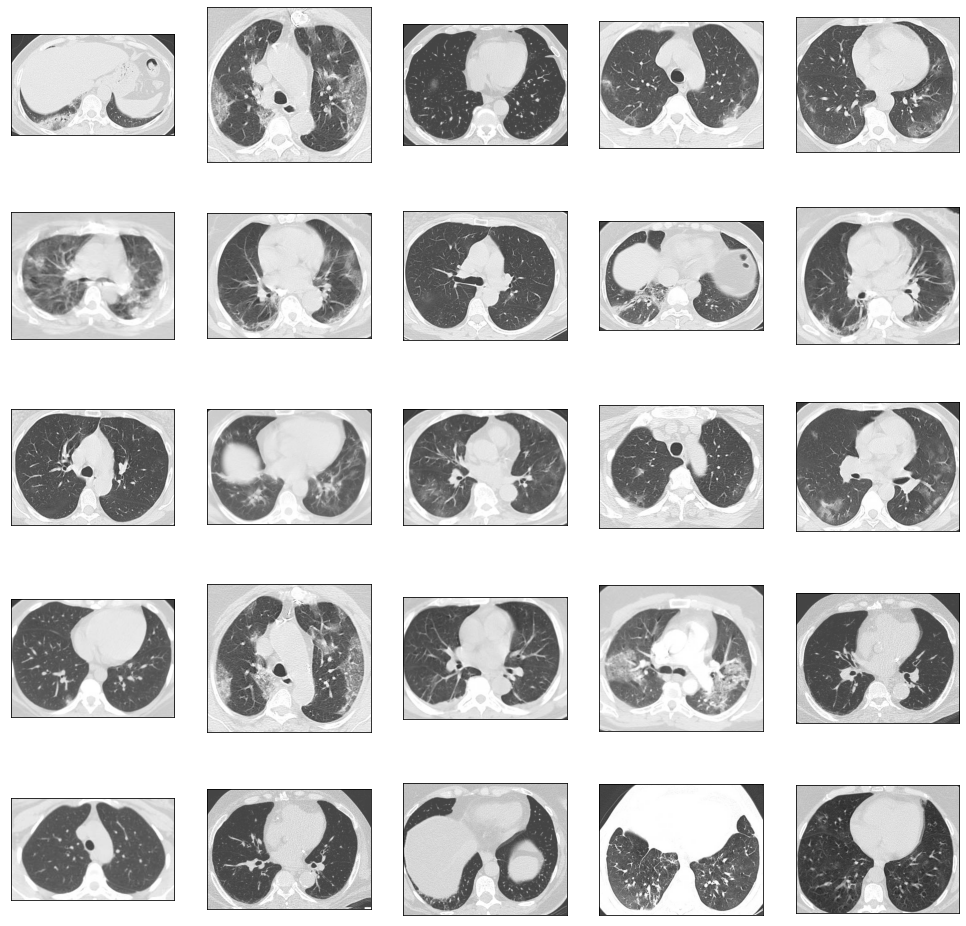

In [34]:
def plot_defects(directory, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(17, 17))
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = "/tmp/data/"+directory+"/"+dir[n]
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(imread(image_path))
            n += 1
plot_defects("COVID",5,5)

In [8]:
dir=[i for i in os.listdir("/tmp/data/non-COVID")]

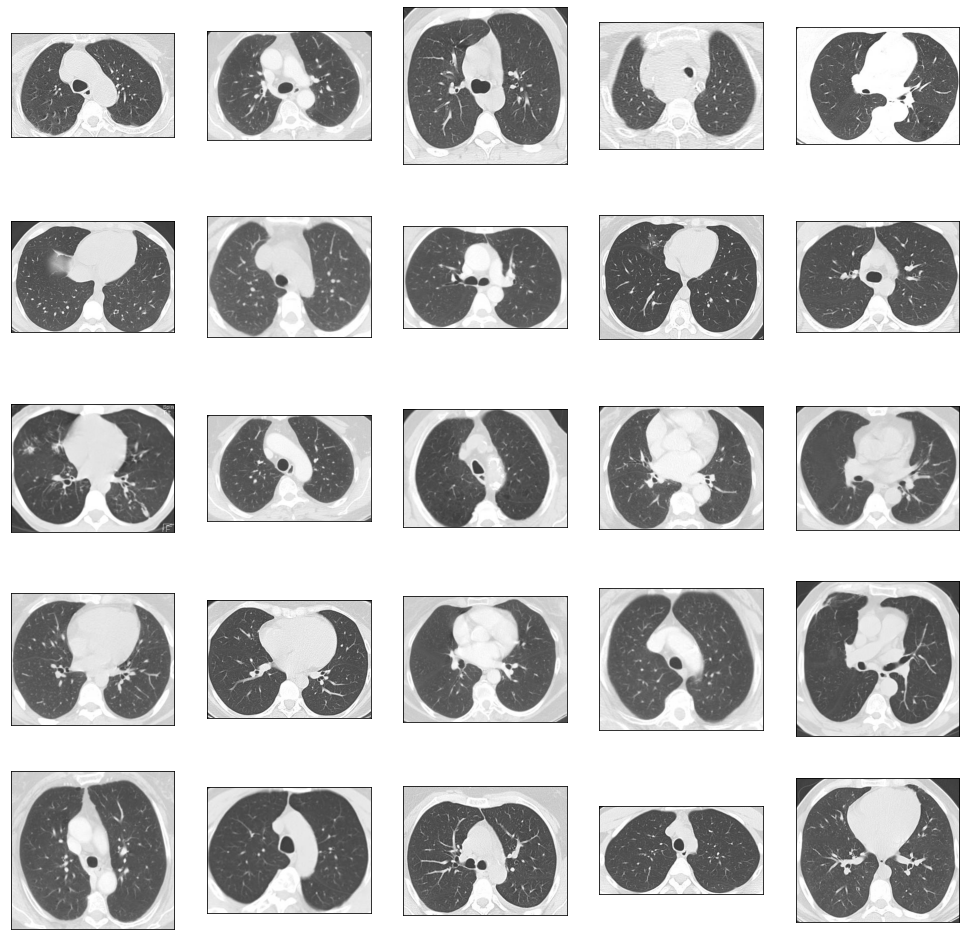

In [9]:
plot_defects("non-COVID",5,5)

In [10]:
sample=Image.open("/tmp/data/non-COVID/Non-Covid (1).png")
sample.size

(321, 229)

In [11]:
sample.mode

'RGBA'

In [19]:
width=[]
height=[]
for i in data[0]:
  width_temp,height_temp=i.size
  width.append(width_temp)
  height.append(height_temp)

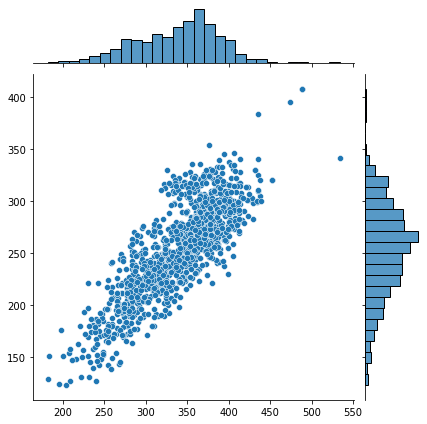

In [20]:
sns.jointplot(x=width,y=height)

In [21]:
print(sum(width)/len(width))
print(sum(height)/len(height))

338.2667731629393
252.7803514376997


In [22]:
width=[]
height=[]

for i in data[1]:
  width_temp,height_temp=i.size
  width.append(width_temp)
  height.append(height_temp)

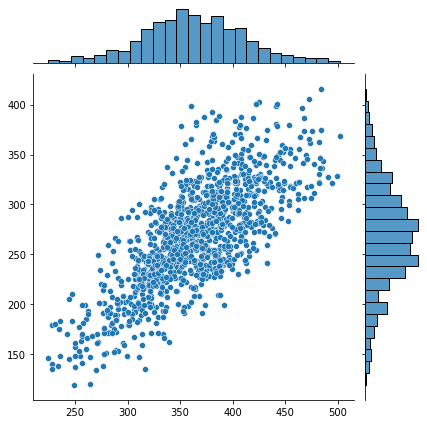

In [23]:
sns.jointplot(x=width,y=height)

In [24]:
print(sum(width)/len(width))
print(sum(height)/len(height))

362.6859235150529
267.2262001627339


In [25]:
print((338+362)/2)
print((253+267)/2)

350.0
260.0


In [14]:
for i in os.listdir("/tmp/data/COVID"):
  temp=Image.open("/tmp/data/COVID/"+i).convert("RGB").resize((350,260))
  temp.save("/tmp/RGB_Data/covid/"+i)

In [17]:
for i in os.listdir("/tmp/data/non-COVID"):
  temp=Image.open("/tmp/data/non-COVID/"+i).convert("RGB").resize((350,260))
  temp.save("/tmp/RGB_Data/non_covid/"+i)

In [23]:
head_dir="/tmp/RGB_Data"
dir=[i for i in os.listdir(head_dir+"/covid")]

In [37]:
def plot_defects(directory, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(17, 17))
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = "/tmp/RGB_Data/"+directory+"/"+dir[n]
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(imread(image_path))
            n += 1

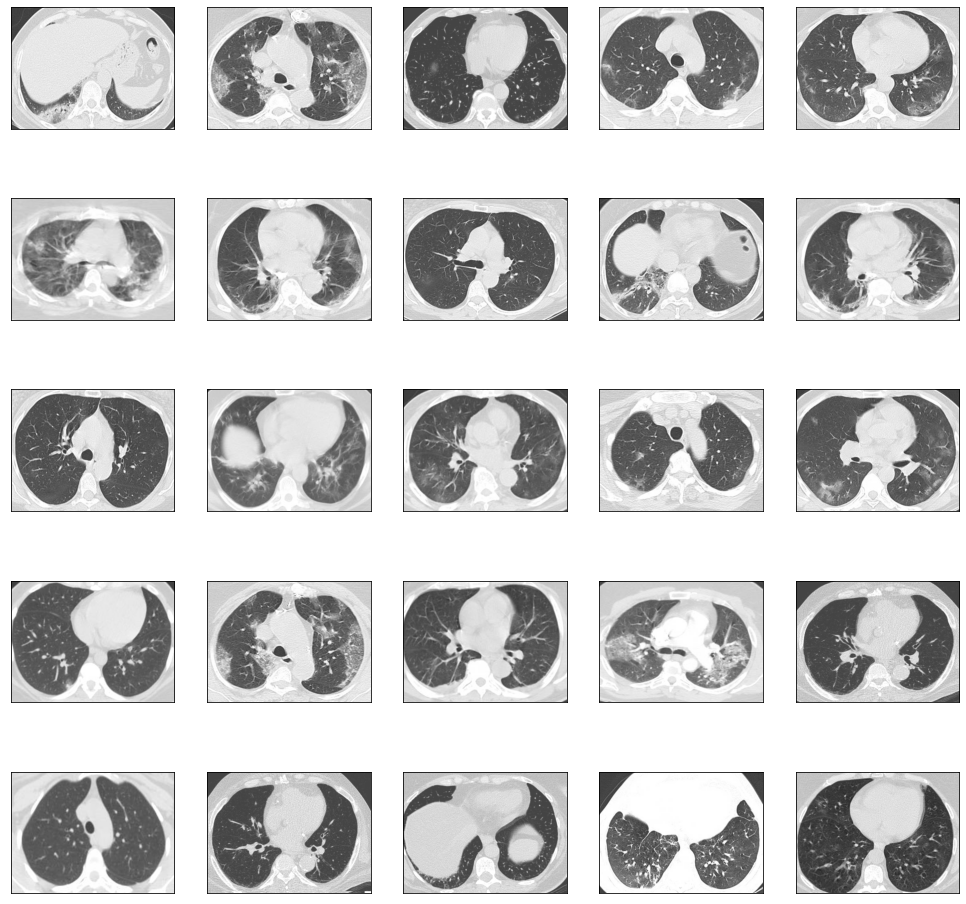

In [38]:
plot_defects("covid",5,5)

In [10]:
for i in range(2):
  for j in range(len(data[i])):
    data[i][j]=data[i][j].resize((350,260))

In [11]:
df=[[],[]]
for i in range(2):
  for j in range(len(data[i])):
    df[0].append(data[i][j])
    df[1].append(i)

In [12]:
df[1]=to_categorical(df[1])

In [13]:
x=df[0]
y=df[1]

In [14]:
frame=[]
for i in x:
  frame.append(np.array(i)/255)

In [16]:
xtrain, xtest, ytrain, ytest= train_test_split(frame,y, test_size=.1)
xtrain, xval, ytrain, yval= train_test_split(xtrain,ytrain, test_size=.1)

In [19]:
x=frame
del frame

In [26]:
print(len(xtrain))
print(len(ytest))
print(len(yval))

2008
249
224


In [21]:
es=EarlyStopping(patience=2)

In [22]:
model = Sequential()

model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sigmoid', metrics=['accuracy'])

model.fit(xtrain, ytrain, validation_data=(xval,yval), callbacks=[es], epochs=20)

ValueError: ignored

In [ ]:
import pandas
history=pandas.DataFrame(model.history.history)

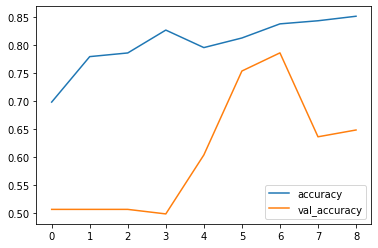

In [ ]:
history[["accuracy","val_accuracy"]].plot()

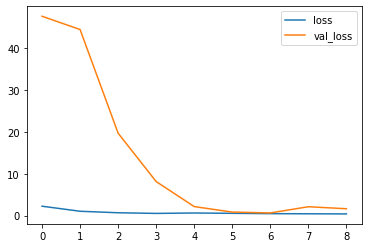

In [ ]:
history[["loss","val_loss"]].plot()

In [ ]:
prediction=np.argmax(model.predict(test), axis=-1)